# Исследование объявлений о продаже квартир
## Описание проекта
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

## Задачи исследования

### Этап 1: Загрузить, изучить и визуализировать данные 
Загрузим данные из файла в датафрейм.
Изучим общую информацию о полученном датафрейме.
Построим общую гистограмму для всех числовых столбцов таблицы.

### Этап 2: Предобработка данных
Найдем и изучим пропущенные значения в столбцах.
Заполним пропущенные значения, где это возможно.
Изменим тип данных в выбранных столбцах.
Устраним неявные дубликаты в столбце с названиями населённых пунктов.
Устраним редкие и выбивающиеся значения.

### Этап 3: Добавление новых столбцов
Добавим столбцы с параметрами: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.

### Этап 4: Исследовательский анализ данных
Исследуем параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.
Построим гистограммы для каждого из этих параметров и описывайте наблюдения.

### Этап 5: Общий вывод
Выведем полученные результаты и основные выводы проведённого исследования.

### Описание данных:

- locality_name — название населённого пункта
- cityCenters_nearest — расстояние до центра города (м)
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- floor — этаж
- rooms — число комнат
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- balcony — число балконов
- is_apartment — апартаменты (булев тип)
- total_images — число фотографий квартиры в объявлении
- first_day_exposition — дата публикации
- last_price — цена на момент снятия с публикации
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

# Этап 1. Изучить общую информауию о данных

In [603]:
#импрорт нужных библиотек 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt 


try:
    real_estate_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except Exception:
    real_estate_df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

pd.options.display.max_columns = None

Выведy основную информацию о датафрейме с помощью метода info()

In [604]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем первые 5 строчек датафрейма на экран

In [605]:
real_estate_df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Согласно исходным данным, в таблице содержатся следующие названия столбцов:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Построим гистрограмму для всех числовых типов данных датафрейма

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

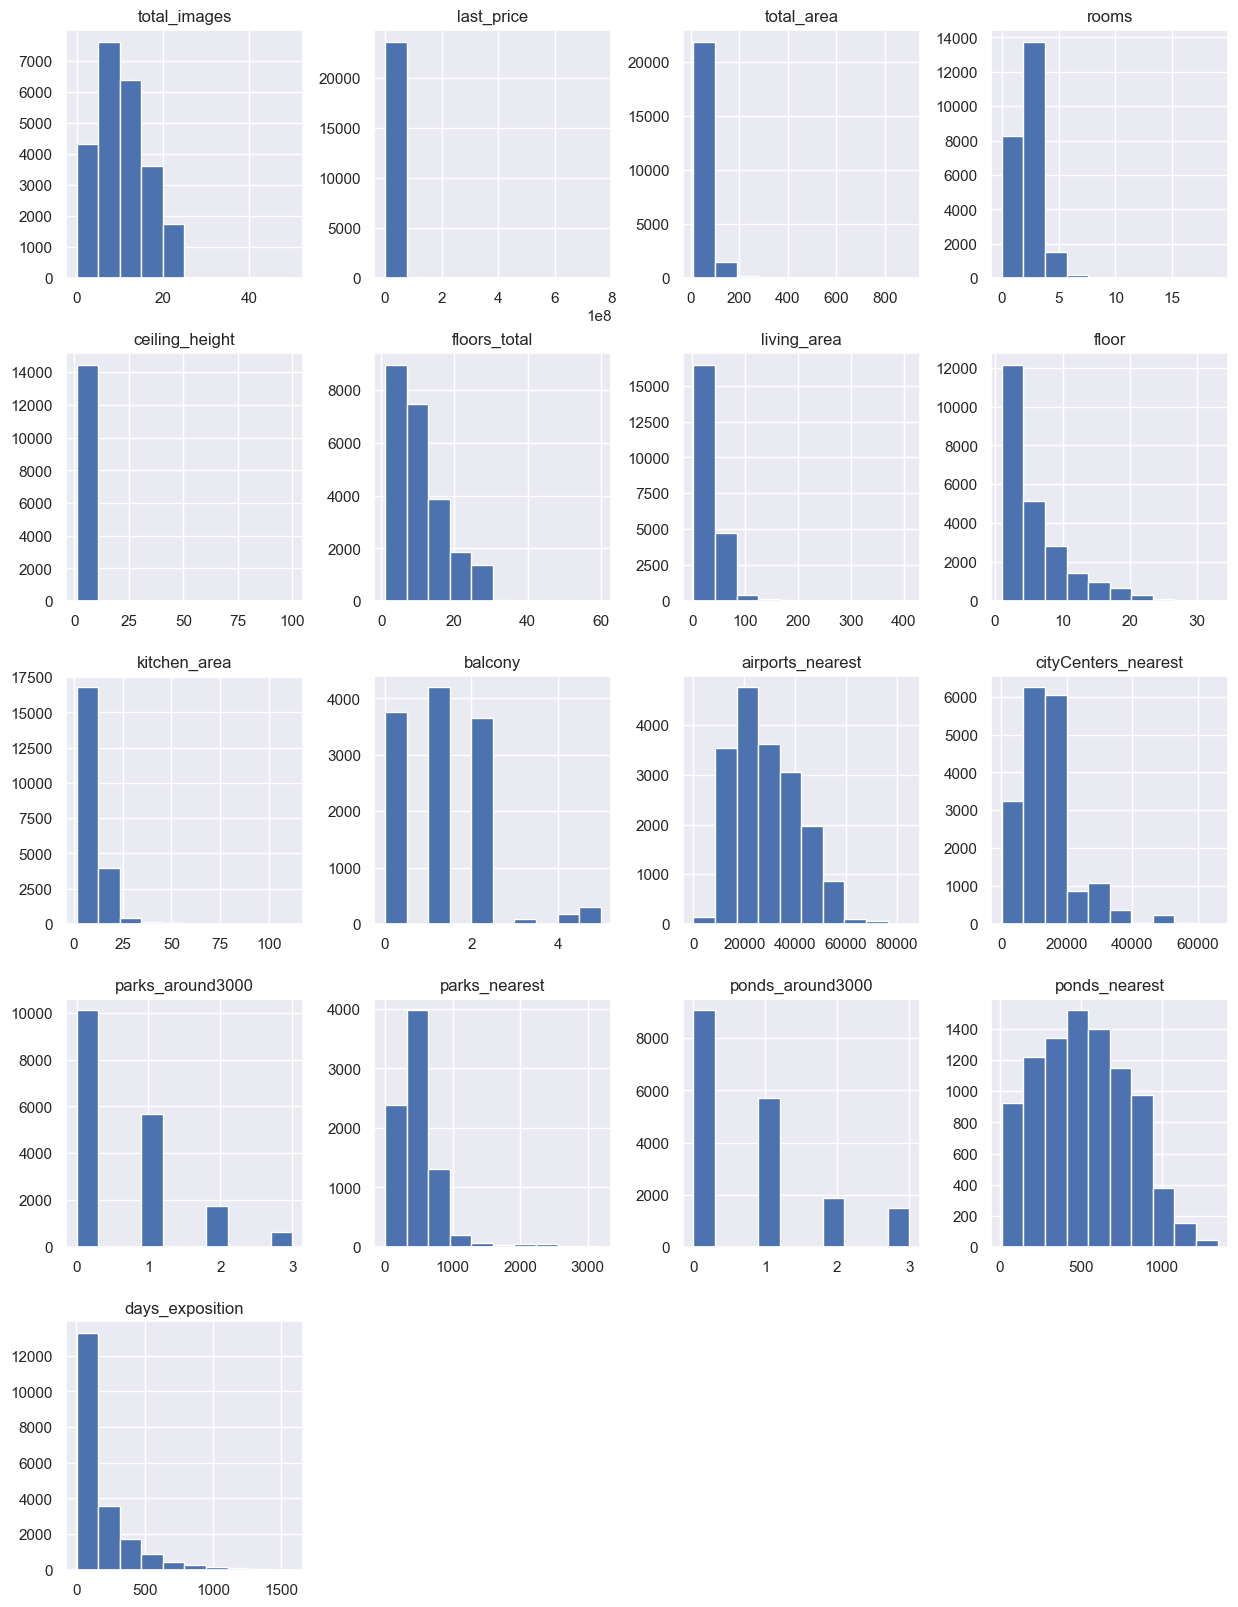

In [606]:
real_estate_df.hist(figsize=(15, 20))

### Вывод: 
В датафрейме содержится информация о квартирах, которые были выставленны на продажу в городе Санкт-Петербург и его области. Всего в датасете информация о 23699 квартирах. 

Проблемы, которые нужно решить: 
1) много пропущенных значений;
2) в некоторых столбцах нарушен стиль названия;
3) некорректные типы данных;
4) много выбросов (надо понять их природу и устранить если требуется).

# Этап 2. Предобработка данных

В предобратке данных необходимо сделать следующее: 
1. Проверить наличие пропусков. Там, где возможность есть, от пропусков избавиться 
2. Изменить типы данных, если в этом есть необходимость
3. Проверить наличие дубликатов. Избваиться от дубликатов
4. Найти и устранить редкие выбивающиеся значения
5. Изменить названия столбцов

## Переименование столбцов

В столбцах `cityCenters_nearest`, `ponds_around3000`, `parks_around3000` нарушен стиль. Все названия столбцов начинаются с маленькой буквы, а пробелы между словами заменены нижним подчеркиванием. Это необходимо исправить. 

In [607]:
real_estate_df = real_estate_df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                                                'parks_around3000':'parks_around_3000', 
                                                'ponds_around3000':'ponds_around_3000'})

In [608]:
real_estate_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

## Поиск дубликатов 

In [609]:
print(f'Количество явных дубликатов: {real_estate_df.duplicated().sum()}')

Количество явных дубликатов: 0


Отлично, в данных нет явных дубликатов. Посмотрим на неявные


In [610]:
print(f'Количество уникальных значений столбца: {len(real_estate_df.locality_name.unique())}')


Количество уникальных значений столбца: 365


Приведем все названия к нижнему регистру для единообразия

In [611]:
real_estate_df['locality_name'] = real_estate_df['locality_name'].str.lower() 

Выведем количество уникальных значений столбца

In [612]:
(real_estate_df.locality_name.unique())[:30]

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов'], dtype=object)

При первом осмотре видно, что проблема в букве ё. Заменим ее во всех местах на букву е. 

In [613]:
real_estate_df['locality_name'] = real_estate_df['locality_name'].str.replace('ё', 'е')
print(f'Количество уникальных значений столбца: {len(real_estate_df.locality_name.unique())}')

Количество уникальных значений столбца: 331


От дубликатов избавлись

## Пропуски

In [614]:
real_estate_df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Для удобтсва и понимания выведу их в процентах

In [615]:
real_estate_df.isna().sum().sort_values()/real_estate_df.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around_3000       23.283683
parks_around_3000       23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Процент пропущенных в `floors_total` очень невелик, поэтому эти данные можно удалить

In [616]:
real_estate_df.dropna(subset=['floors_total'], inplace=True)

In [617]:
real_estate_df['floors_total'].isna().sum()

0

Разберемся со столбцом `ceiling_height`. У этого столбца почти 40% пропусков. Если заполнять пропуски медианным значением - это может сильно повлиять на результаты данных. Проверим корреляцию между высотой потолка и удаленности от центра. 

In [618]:
real_estate_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [619]:
real_estate_df['ceiling_height'].corr(real_estate_df['city_centers_nearest'])

-0.09169207061275145

Наблюдаем отрицательную корреляцию. Чем расстояние до центра ближе тем выше потолки. Посмотрим описание столбца `city_centers_nearest`

In [620]:
real_estate_df['city_centers_nearest'].describe()

count    18104.000000
mean     14185.084015
std       8614.132292
min        181.000000
25%       9233.750000
50%      13093.000000
75%      16287.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Заполним пропуски в высоте потолков медианными значениями, разделив данные на группы по расстоянию от центра. 

In [621]:
# Создание словаря с группами и их границами
groups = {'Group1': (181, 9233.75),
          'Group2': (9233.75, 13093),
          'Group3': (13093, 16287),
          'Group4': (16287, 65968)}

# Итерация по каждой группе
for group, (min_val, max_val) in groups.items():
    # Выбор наблюдений в текущей группе
    group_data = real_estate_df[(real_estate_df['city_centers_nearest'] >= min_val) 
                                & (real_estate_df['city_centers_nearest'] <= max_val)]
    # Вычисление медианы для текущей группы
    group_median = group_data['ceiling_height'].median()
    # Заполнение пропусков в соответствии с текущей группой
    real_estate_df.loc[group_data.index, 'ceiling_height'] = group_data['ceiling_height'].fillna(group_median)


Еще раз посчитаем процент пропусков

In [622]:
real_estate_df['ceiling_height'].isna().sum() / real_estate_df['ceiling_height'].shape[0] * 100

10.866895354254012

Эти пропуски уже заполним общей медианой

In [623]:
real_estate_df['ceiling_height'] = real_estate_df['ceiling_height'].fillna(real_estate_df['ceiling_height'].median())

Здесь же сразу разберемся с аномальными значениями высоты потолков

In [624]:
real_estate_df['ceiling_height'].describe()

count    23613.000000
mean         2.731801
std          0.994014
min          1.000000
25%          2.600000
50%          2.600000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

Также в данных видно, что максимальное значение высоты потолка - `100`м, а минимальная `1`м. 


* Минимальный уровень[^1] потолков в жилых комнатах для холодных районов IVA, IA, IБ, IГ, IД составляет от 2,7 м, для всех остальных — 2,5 м и более
* Максимальная высота стен не регламентирована, однако новые дома строятся с показателем не более `3,2` м.
* Исключения составляют квартиры элитных жилых комплексов, в которых потолки могут возвышаться на высоте до `4` м. 

Среднестатистическая стандартная высота потолков:

- «сталинки» — от `3` до `3,6` м;
- «хрущевки» — `2,5` м, реже — `2,7` м;
-  «брежневки» — `2,6`–`2,7` м;
- панельные и блочные дома — `2,5`–`2,7` м. 

[^1]: https://spb.101novostroyka.ru/info/standartnaya-vysota-potolkov-normativy

Возможно, при заполнении данных пользователь сделал ошибку. Поэтому 3 метра превратились в 30 метров. А вот с квартирами до 2.5 метров интереснее. Возможно, под видом квартиры продают чердак или подвал. Посмотрим ближе на данные. 
 

In [625]:
real_estate_df[real_estate_df['ceiling_height'] < 2.5].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
193,6,7920000.0,83.8,2017-08-17T00:00:00,4,2.47,9.0,55.9,9,NaN,False,False,9.8,1.0,санкт-петербург,30352.0,7724.0,0.0,NaN,1.0,289.0,155.0
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
552,11,2999000.0,33.5,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,False,False,6.5,NaN,санкт-петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0
632,20,3350000.0,35.0,2017-11-14T00:00:00,2,2.45,9.0,21.0,9,False,False,False,6.0,2.0,поселок городского типа кузьмоловский,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,12,7100000.0,65.5,2016-03-30T00:00:00,4,2.46,5.0,51.0,4,NaN,False,False,9.4,0.0,санкт-петербург,24542.0,5110.0,1.0,572.0,0.0,NaN,82.0
1078,8,5450000.0,59.5,2018-05-07T00:00:00,3,2.45,9.0,38.4,6,NaN,False,False,5.7,2.0,санкт-петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,173.0
1322,16,6000000.0,55.0,2019-04-11T00:00:00,3,2.40,5.0,30.0,1,False,False,False,15.0,NaN,пушкин,14234.0,26388.0,0.0,NaN,0.0,NaN,NaN
1582,4,4100000.0,45.6,2016-01-13T00:00:00,2,2.30,9.0,28.4,8,False,False,False,7.0,2.0,санкт-петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
1677,3,2990000.0,36.1,2018-04-26T00:00:00,1,2.48,12.0,18.3,4,NaN,False,False,7.0,1.0,кронштадт,65224.0,46949.0,1.0,631.0,1.0,452.0,133.0
2236,2,2400000.0,63.6,2018-03-21T00:00:00,4,2.40,5.0,49.0,2,NaN,False,False,8.0,1.0,новая ладога,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Уже по первым строкам видно, что квартиры с очень низкими потолками продаются не только на первых и последних этажах. Поэтому квартирах с аномально низкими значениями заменим на медианное, а с аномально большими поделим на 10. Посмотрим более детально на гистрограмму в диапозоне от 4 до 11м. 

<AxesSubplot:>

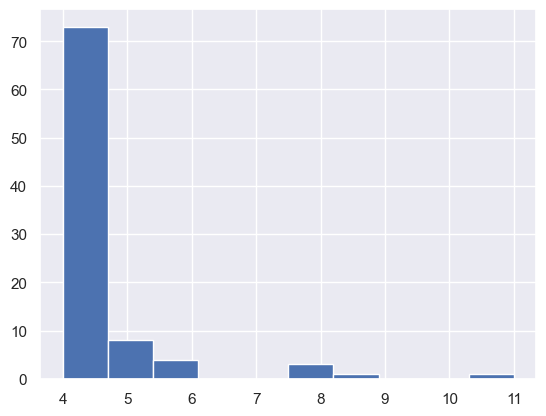

In [626]:
real_estate_df['ceiling_height'].hist(range=(4, 11))

По гистограмме видно, что в датасете есть квартиры с высотой 6, 8, 9 метров. Так как максимальная высота потолков не установлена - такое может быть. Например, двухэтажная квартира. Поэтому все, что выше 10 метров - поделим на 10. Также заменим значения потолков на медианное у квартир с потолками ниже 2.5 метров

In [627]:
def change_ceiling_height(height):
    if height > 10:
        height /= 10
    elif height < 2.5:
        height = 2.65 
    return height



real_estate_df['ceiling_height'] = real_estate_df['ceiling_height'].apply(change_ceiling_height)


In [628]:
real_estate_df['ceiling_height'].describe()

count    23613.000000
mean         2.706198
std          0.253276
min          1.030000
25%          2.600000
50%          2.600000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

Изменим столбец `balcony`. Логично предположить, что пропуски в этом столбце означают отсутсвие балкона. Заменим пропуски на 0

In [629]:
real_estate_df['balcony'] = real_estate_df['balcony'].fillna(0)

In [630]:
real_estate_df.isna().sum().sort_values()

total_images                0
balcony                     0
open_plan                   0
floor                       0
floors_total                0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
ceiling_height              0
locality_name              48
living_area              1870
kitchen_area             2231
days_exposition          3172
parks_around_3000        5508
ponds_around_3000        5508
city_centers_nearest     5509
airports_nearest         5532
ponds_nearest           14552
parks_nearest           15568
is_apartment            20838
dtype: int64

In [631]:
real_estate_df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,NaN,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.30,4,NaN,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,3.00,14.0,NaN,9,NaN,False,False,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,NaN,False,False,9.10,0.0,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,NaN,False,False,14.40,1.0,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.60,24.0,NaN,22,NaN,False,False,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,NaN,False,False,8.81,0.0,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Изучим столбцы `is_apartment`. Скорее всего пользователь не указал, что это апартаменты, потому что это не апартаменты. Заменим все значения на False. 

In [632]:
real_estate_df['is_apartment'] = real_estate_df['is_apartment'].fillna(False)

In [633]:
real_estate_df.isna().sum().sort_values()

total_images                0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
floors_total                0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
ceiling_height              0
locality_name              48
living_area              1870
kitchen_area             2231
days_exposition          3172
parks_around_3000        5508
ponds_around_3000        5508
city_centers_nearest     5509
airports_nearest         5532
ponds_nearest           14552
parks_nearest           15568
dtype: int64

Избавились от пропусков в столбце `is_apartment`. Это хорошо, в столбце `living_area` много пропусков. Заменим пропуски на медианное значение площади по количеству комнат. 

In [634]:
for room in real_estate_df['rooms'].unique():
    real_estate_df.loc[(real_estate_df['rooms'] == room) & 
                       (real_estate_df['living_area'].isna()), 'living_area'
                       ] = real_estate_df.loc[(real_estate_df['rooms'] == room), 'living_area'].median()

In [635]:
real_estate_df['living_area'].isna().sum()

0

Заменим пропуски `kitchen_area` более простым способом, везде поставим медианное значение. Так как площадь кухни имеет более меньший вес чем жилая площадь. 

In [636]:
real_estate_df['kitchen_area'] = real_estate_df['kitchen_area'].fillna(real_estate_df['kitchen_area'].median())

In [637]:
real_estate_df['kitchen_area'].isna().sum()

0

In [638]:
real_estate_df['locality_name'].isna().sum()

48

Квартир без указания города мало, поэтому их можно смело удалить. Погоды не сделают, а мешать будут. 

In [639]:
real_estate_df = real_estate_df.dropna(subset=['locality_name'])

In [640]:
real_estate_df['locality_name'].isna().sum()

0

Начнем анализировтаь картографические данные 

In [641]:
real_estate_df['parks_around_3000'].describe() #посмотрим минимальное значение в столбце

count    18065.000000
mean         0.611569
std          0.802088
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

In [642]:
real_estate_df['ponds_around_3000'].describe() #минимальное значение в столбце

count    18065.000000
mean         0.769499
std          0.938669
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

Разберемся с парками и прудами. 
- `parks_around_3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around_3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)

Из этих данных можно предположить, что если нет парков и прудов в радиусе `3` км, то и в шаговой доступности тоже нет парков. Поэтому можно заменить пропуски в столбцах `parks_nearest` и `ponds_nearest` на `0`, если в столбцах `parks_around_3000` и `ponds_around_3000` значение 0

In [643]:
#Заменит значения в расстояних до ближайшего парка и пруда на 0, если нет парков и прудов в радиусе 3км
def replace_to_zero(real_estate_df):
    real_estate_df.loc[
        (real_estate_df['parks_around_3000'] == 0) &
        (real_estate_df['ponds_around_3000'] == 0), 
        ['parks_nearest', 'ponds_nearest']
    ] = 0
    return real_estate_df

replace_to_zero(real_estate_df)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.6,1,False,False,False,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,False,False,False,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,3.00,14.0,45.0,9,False,False,False,9.10,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,False,False,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.60,5.0,38.0,4,False,False,False,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.60,3.0,29.7,1,False,False,False,9.10,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,30.5,12,False,False,False,23.30,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [644]:
real_estate_df['parks_nearest'].isna().sum() #избавились от 5806 дублей

9745

In [645]:
real_estate_df['ponds_nearest'].isna().sum() #избавились от 5806 дублей

8739

Выведем процент пропусков

In [646]:
real_estate_df.isna().sum().sort_values()/real_estate_df.shape[0]*100

total_images             0.000000
locality_name            0.000000
balcony                  0.000000
kitchen_area             0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
studio                   0.000000
floors_total             0.000000
ceiling_height           0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
living_area              0.000000
days_exposition         13.456397
parks_around_3000       23.339699
ponds_around_3000       23.339699
city_centers_nearest    23.343942
airports_nearest        23.441545
ponds_nearest           37.084659
parks_nearest           41.353703
dtype: float64

Остальные пропуски в расстояниях и количествах до прудов и парков лучше оставить. Так как это картографические значения, они заполнялись машиной, а не пользователем. Поэтому заполнение медианным значением может сильно исказить данные. 

Проверим корреляцию между расположением в центре, удаленности от аэропорта и ценой за квартиру

In [647]:
real_estate_df['city_centers_nearest'].corr(real_estate_df['last_price'])

-0.20635314264311072

In [648]:
real_estate_df['airports_nearest'].corr(real_estate_df['last_price'])

-0.026216052641084984

Корреляция практически не наблюдается. Если заполнять данные по другим корреляциям, то высокий риск исказить результаты. Поэтому лучше всего будет оставить `city_centers_nearest` и `airports_nearest`  эти без изменения. 

В столбце `days_exposition` осталось 13% пропусков. Возможно, это еще активные объявления, поэтому заменять пропуски в этом месте не имеет смысла 


## Преобразуем типы данных 

In [649]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

В данных, которые содержат столбцы `floors_total`, `balcony`, `total_area`, `last_price`, `parks_around_3000`, `ponds_around_3000`, `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` не может быть вещественного числа. Заменим на целочисленное. Однако, если в столбце присутвует Nan - в int перевести возможности нет. Поэтому данные в  `parks_around_3000`, `ponds_around_3000`, `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` округлим. 
В столбце `first_day_exposition` изменим тип на дату и время

In [650]:
real_estate_df['first_day_exposition'] = pd.to_datetime(real_estate_df['first_day_exposition'])

for col in ['floors_total', 'balcony', 'total_area', 'last_price']:
    real_estate_df[col] = real_estate_df[col].astype('int64')

for col in ['airports_nearest',
            'city_centers_nearest','parks_nearest','ponds_nearest',
            'parks_around_3000','ponds_around_3000','days_exposition']:
    real_estate_df[col] = real_estate_df[col].round()



In [651]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  int64         
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

## Работа с выбросами

In [652]:
real_estate_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.00,6.0,9.0,14.00,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.00,3400000.0,4646000.0,6790000.00,763000000.0
total_area,23565.0,6.009523e+01,3.566876e+01,12.00,40.0,52.0,69.00,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.00,1.0,2.0,3.00,19.0
ceiling_height,23565.0,2.705945e+00,2.531558e-01,1.03,2.6,2.6,2.75,10.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.00,5.0,9.0,16.00,60.0
living_area,23565.0,3.432433e+01,2.172123e+01,2.00,18.4,30.3,42.70,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.00,2.0,4.0,8.00,33.0
kitchen_area,23565.0,1.042323e+01,5.631746e+00,1.30,7.3,9.1,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.00,0.0,0.0,1.00,5.0


Для обнаружения аномалий (выбросов) в каждом столбце, можно использовать статистические метрики, такие как среднее значение (mean), минимальное значение (min), максимальное значение (max), а также квартили (25%, 50%, 75%) и графическое представление данных. Посмотрим на столбцы. 

 **total_area**

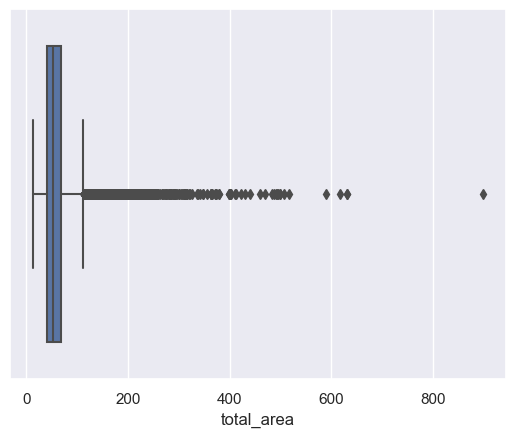

In [653]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['total_area'])
plt.show()


По графику видим, что в усы входят только данные приблизительно до 150 квадратных метров. А 900 квадратных метров очень похоже на выброс. 

In [654]:
real_estate_df[real_estate_df['total_area']>150]['total_area'].count() / real_estate_df['total_area'].shape[0] * 100

2.3594313600678976

Данных с таким количеством квартир мало - их можно удалить и построить ящик с усами еще раз

In [655]:
real_estate_df = real_estate_df[real_estate_df['total_area'] <= 150]

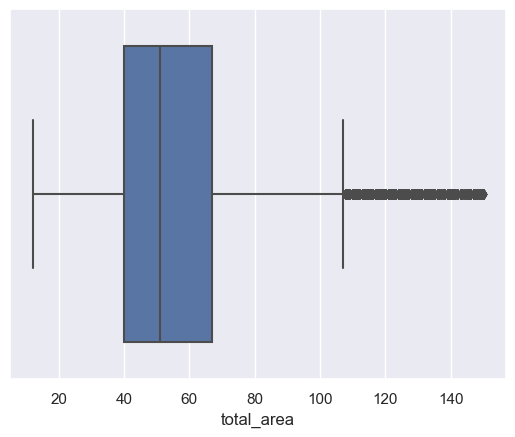

In [656]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['total_area'])
plt.show()


**rooms**

In [657]:
real_estate_df['rooms'].describe()

count    23009.000000
mean         2.000826
std          0.949869
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

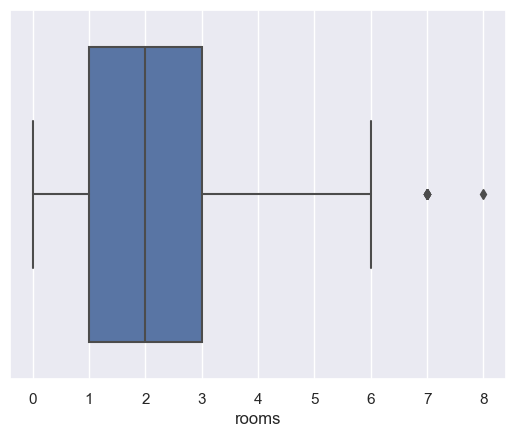

In [658]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['rooms'])
plt.show()

Все, что выше 6 выбивается. Посмотрим на процент таких квартир

In [659]:
real_estate_df[(real_estate_df['rooms']<1) |
               (real_estate_df['rooms']>6)]['total_area'].count()/ real_estate_df['rooms'].shape[0] * 100

0.8779173366943369

Квартир с комнатами больше 6 и меньше 1 комнат очень мало. Их можно удалить из выборки

In [660]:
real_estate_df = real_estate_df[(real_estate_df['rooms'] >= 1) & (real_estate_df['rooms'] <= 6)]

Посмотрим на ящик с усами теперь

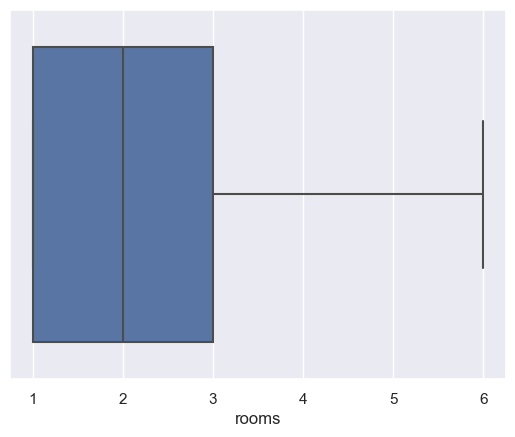

In [661]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['rooms'])
plt.show()

**living_area**

In [662]:
real_estate_df['living_area'].describe()

count    22807.000000
mean        32.345168
std         15.295675
min          2.000000
25%         18.300000
50%         30.000000
75%         42.000000
max        128.000000
Name: living_area, dtype: float64

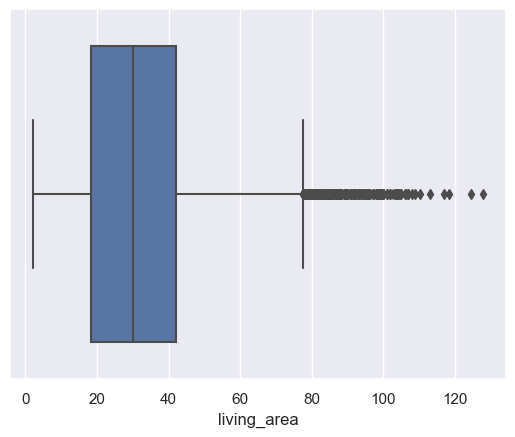

In [663]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['living_area'])
plt.show()

Помотрим на процент квартир с жилой площадью больше 80 

In [664]:
real_estate_df[(real_estate_df['living_area']>80)]['total_area'].count()/ real_estate_df['total_area'].shape[0] * 100

1.1487701144385496

Можно удалить

In [665]:
real_estate_df = real_estate_df[real_estate_df['living_area'] < 80]

Кажется, что квартиры с жилой площадью до 18 квадратных метров тоже выбиваются. Посмотрим на их процентное соотношение 

In [666]:
real_estate_df[(real_estate_df['living_area']<18)]['total_area'].count()/ real_estate_df['total_area'].shape[0] * 100

20.74416126454134

Таких квартир очень много. Удаление может исказить данные. Заменим на медианное значение по количеству комнат

In [667]:
for room in real_estate_df['rooms'].unique():
    median = max(real_estate_df.loc[(real_estate_df['rooms'] == room), 'living_area'].median(), 18)
    real_estate_df.loc[(real_estate_df['rooms'] == room) & 
                       ((real_estate_df['living_area'] < 18)), 'living_area'
                       ] = median

Посмотрим теперь на диаграмму

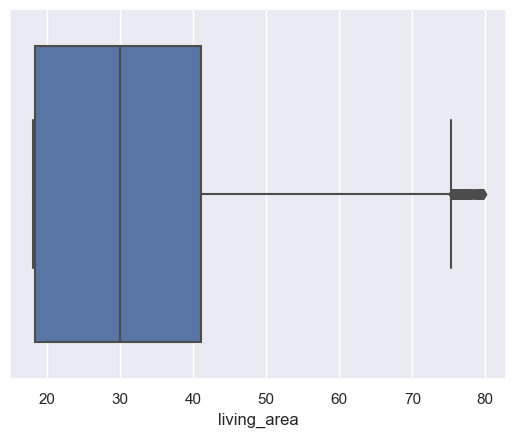

In [668]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['living_area'])
plt.show()

**kitchen_area**

In [669]:
real_estate_df['kitchen_area'].describe()

count    22522.000000
mean        10.048354
std          4.725552
min          1.300000
25%          7.100000
50%          9.100000
75%         11.000000
max         93.000000
Name: kitchen_area, dtype: float64

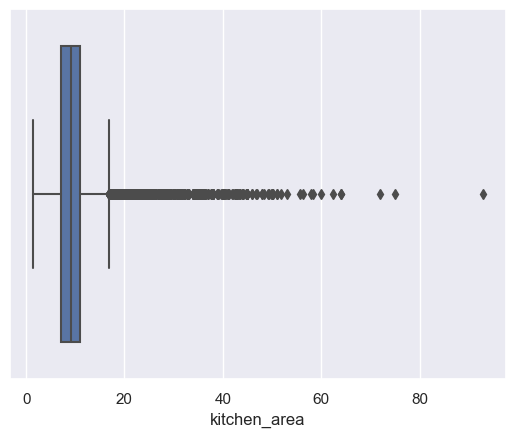

In [670]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['kitchen_area'])
plt.show()

Кухня в 1 квадратный метр кажется подозрительным значением. Посмотрим на процент кухонь с площадью меньше 5 и больше 18

In [671]:
real_estate_df[
    (real_estate_df['kitchen_area'] > 18) | 
    (real_estate_df['kitchen_area'] < 5)
]['kitchen_area'].count() / real_estate_df['kitchen_area'].shape[0] * 100

4.995115886688571

4 процента это не очень много. Можно удалить

In [672]:
real_estate_df = real_estate_df[
    (real_estate_df['kitchen_area'] > 5) &
    (real_estate_df['kitchen_area'] < 18)
]

Посмотрим на ящик с усами теперь

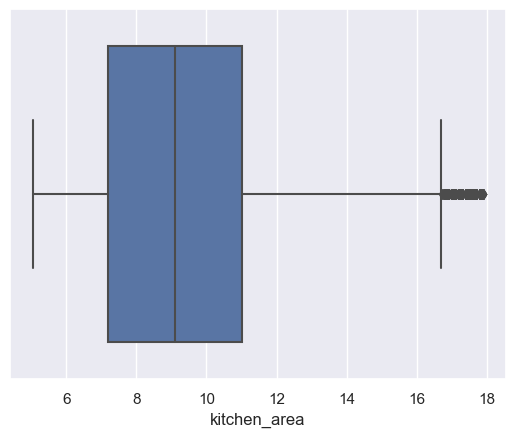

In [673]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['kitchen_area'])
plt.show()

**floors_total**

In [674]:
real_estate_df['floors_total'].describe()

count    20954.000000
mean        10.783669
std          6.565219
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

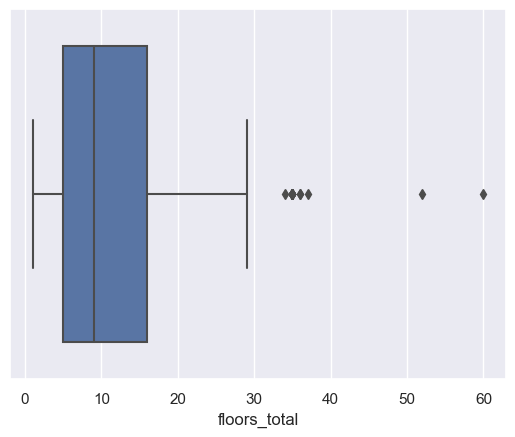

In [675]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['floors_total'])
plt.show()

Посмотрим, сколько домов с этажом меньше 1 и больше 30

In [676]:
real_estate_df[
    (real_estate_df['floors_total'] < 2) |
    (real_estate_df['floors_total'] >30)
]['floors_total'].count() / real_estate_df['floors_total'].shape[0] * 100

0.19089433998281952

Можно удалять

In [677]:
real_estate_df = real_estate_df[
    (real_estate_df['floors_total'] >= 2) &
    (real_estate_df['floors_total'] < 25)
]

Посмотрим на ящик с усами теперь

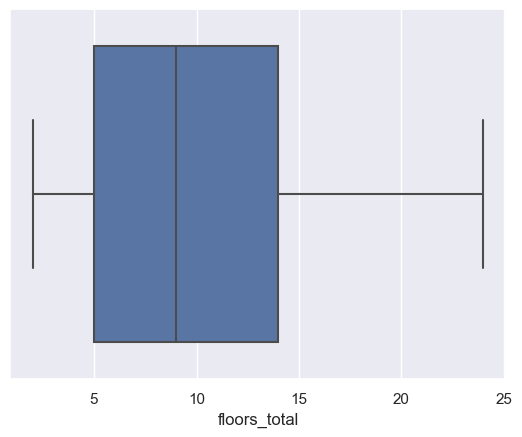

In [678]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['floors_total'])
plt.show()

**last_price**

In [679]:
real_estate_df['last_price'].describe()

count    1.965800e+04
mean     5.219352e+06
std      3.373094e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.499000e+06
75%      6.177632e+06
max      7.734900e+07
Name: last_price, dtype: float64

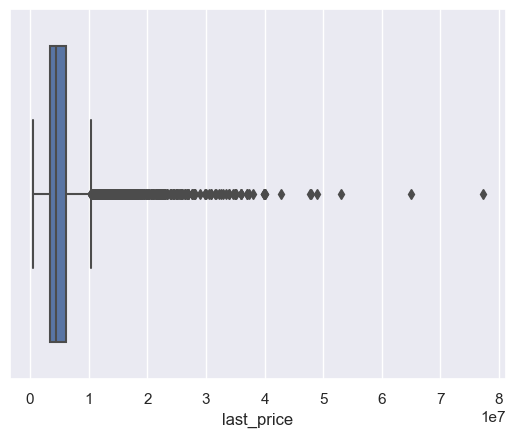

In [680]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['last_price'])
plt.show()

Посмотрим на количество квартир, которые стоят больше 10 миллионов

In [681]:
real_estate_df[
    real_estate_df['last_price'] > 10_000_000
]['last_price'].count() / real_estate_df['last_price'].shape[0] * 100

6.2824295452233185

Можно удалить

In [682]:
real_estate_df = real_estate_df[real_estate_df['last_price'] < 10_000_000]

Посмотрим на ящик с усами

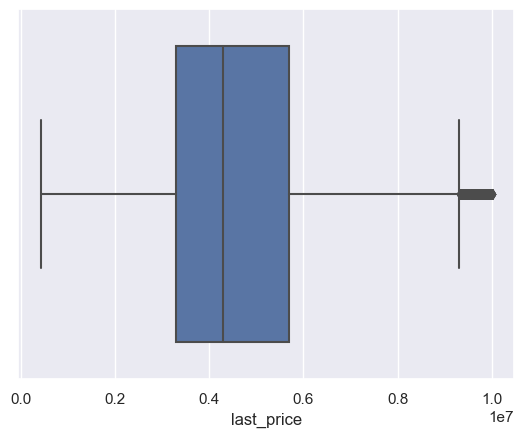

In [683]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['last_price'])
plt.show()

**total_images**

In [684]:
real_estate_df['total_images'].describe()

count    18373.000000
mean         9.715724
std          5.506732
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         39.000000
Name: total_images, dtype: float64

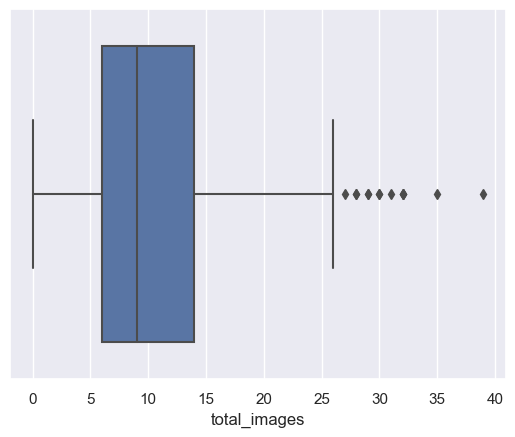

In [685]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['total_images'])
plt.show()

Посмотрим на количесво меньше 5 фотографий и больше 25

In [686]:
real_estate_df[
    (real_estate_df['total_images'] < 2)
    | (real_estate_df['total_images'] > 25)
]['total_images'].count() / real_estate_df['total_images'].shape[0] * 100

8.311108692102543

8% это все же много, чтобы без зазрения совести удалять данные, хоть это все еще меньше 10%. Чем больше данные тем большее количество входит в этот процент. Заменим на медиану

In [687]:
real_estate_df['total_images'] = real_estate_df['total_images'].apply(
    lambda mean: mean if 3 <= mean <= 24 else real_estate_df['total_images'].median())

И еще раз выведем ящик с усами

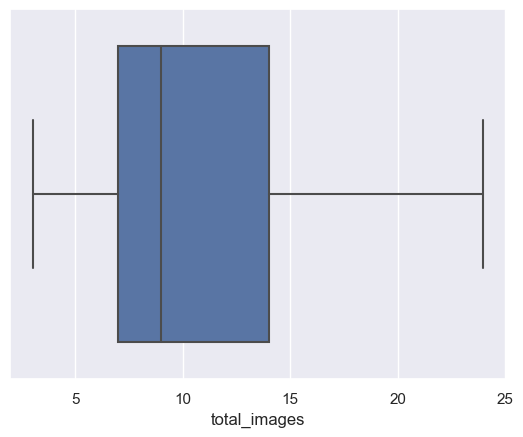

In [688]:
sns.set(style="darkgrid")
sns.boxplot(x=real_estate_df['total_images'])
plt.show()

Еще раз выведем всю статистику

In [689]:
real_estate_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,18373.0,1.057432e+01,4.550631e+00,3.00,7.00,9.0,14.0,24.0
last_price,18373.0,4.585219e+06,1.914020e+06,430000.00,3290000.00,4300000.0,5700000.0,9999999.0
total_area,18373.0,5.166532e+01,1.676393e+01,12.00,39.00,48.0,62.0,146.0
rooms,18373.0,1.927393e+00,8.729161e-01,1.00,1.00,2.0,3.0,6.0
ceiling_height,18373.0,2.665117e+00,2.077160e-01,1.03,2.57,2.6,2.7,8.3
floors_total,18373.0,9.804169e+00,5.505798e+00,2.00,5.00,9.0,13.0,24.0
living_area,18373.0,3.043356e+01,1.192932e+01,18.00,18.00,29.5,39.0,79.0
floor,18373.0,5.390736e+00,4.229289e+00,1.00,2.00,4.0,7.0,24.0
kitchen_area,18373.0,9.033744e+00,2.537428e+00,5.04,7.00,9.0,10.3,17.9
balcony,18373.0,5.793828e-01,9.244092e-01,0.00,0.00,0.0,1.0,5.0


Еще раз выведем матрицу

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositi

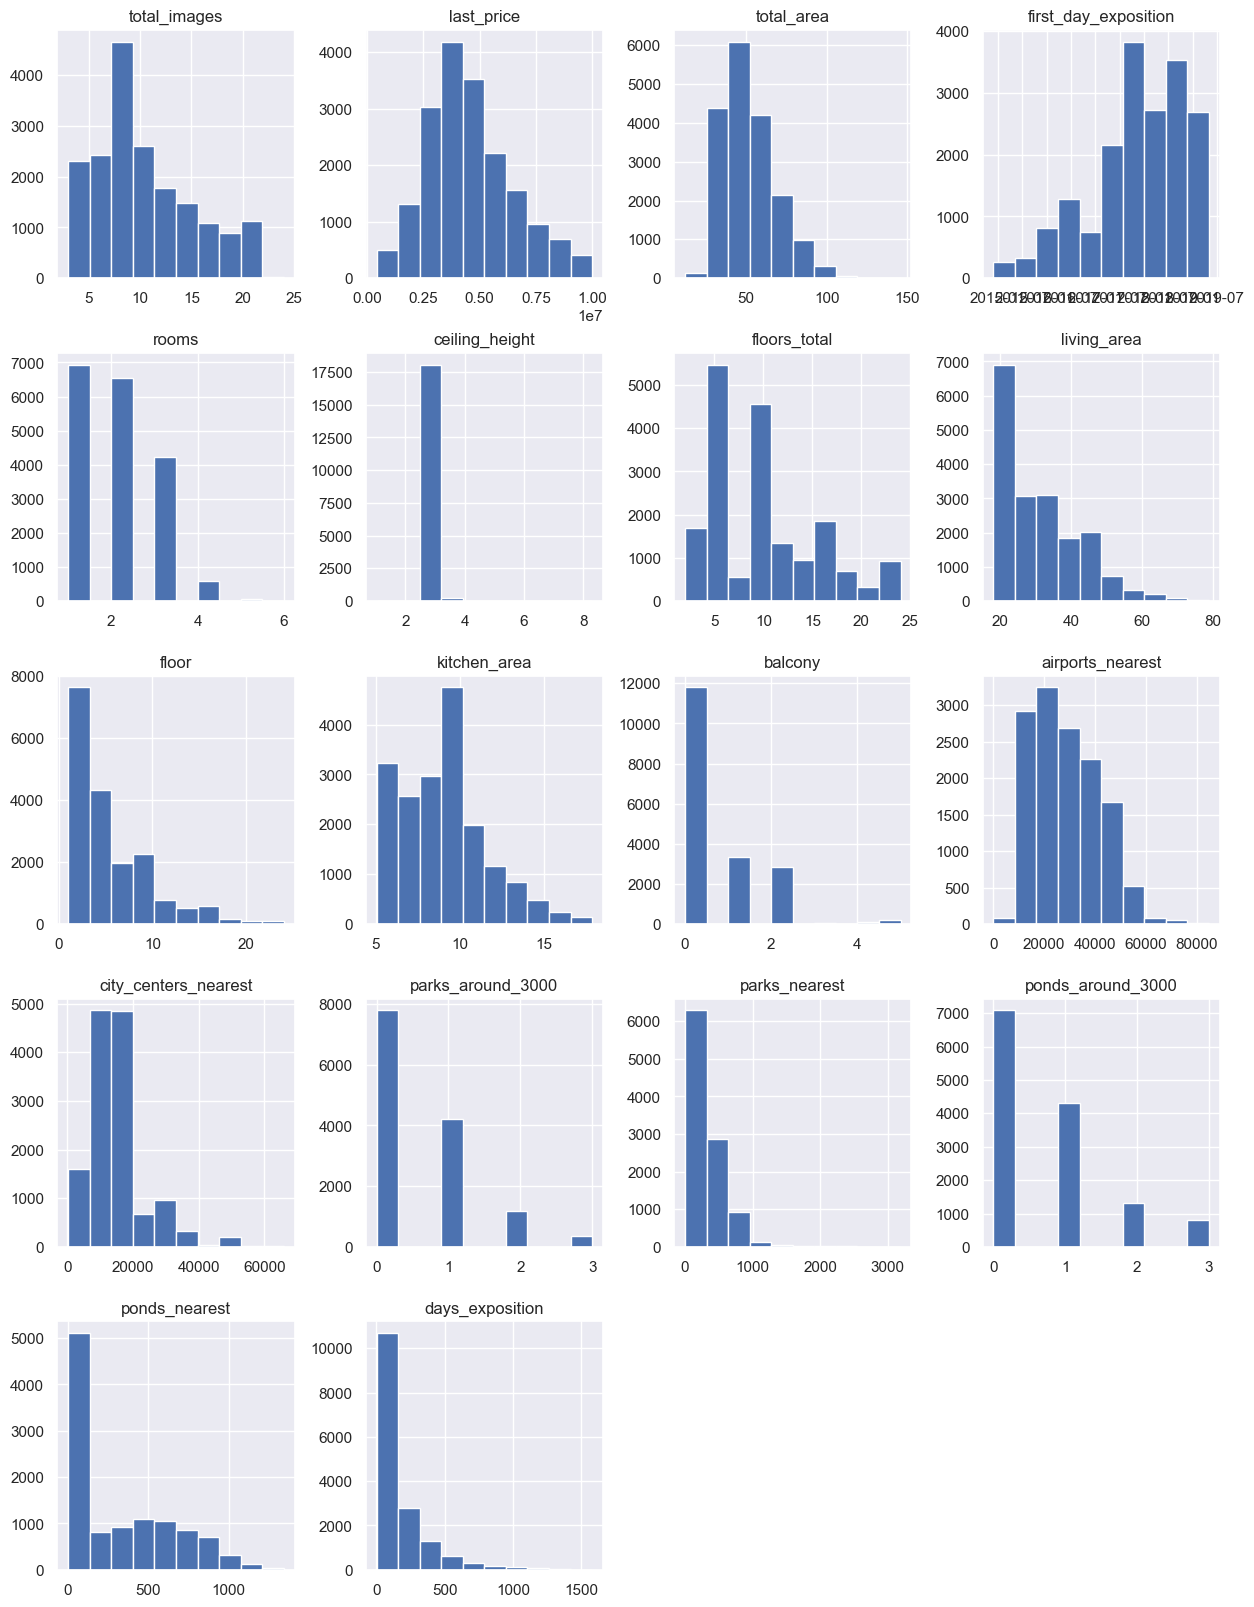

In [690]:
real_estate_df.hist(figsize=(15, 20))

Данные уже хорошо отчищены от аномальных значений. Но еще стоит удалить выбивающиеся значения у `city_centres_nearest` и `airports_nearest` 

**city_centres_nearest и airports_nearest**

In [691]:
real_estate_df = real_estate_df[
    (real_estate_df['airports_nearest'] > 8000) &
    (real_estate_df['airports_nearest'] < 40000)

]

real_estate_df = real_estate_df[
    (real_estate_df['airports_nearest'] > 10000) &
    (real_estate_df['airports_nearest'] < 60000)

]


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositi

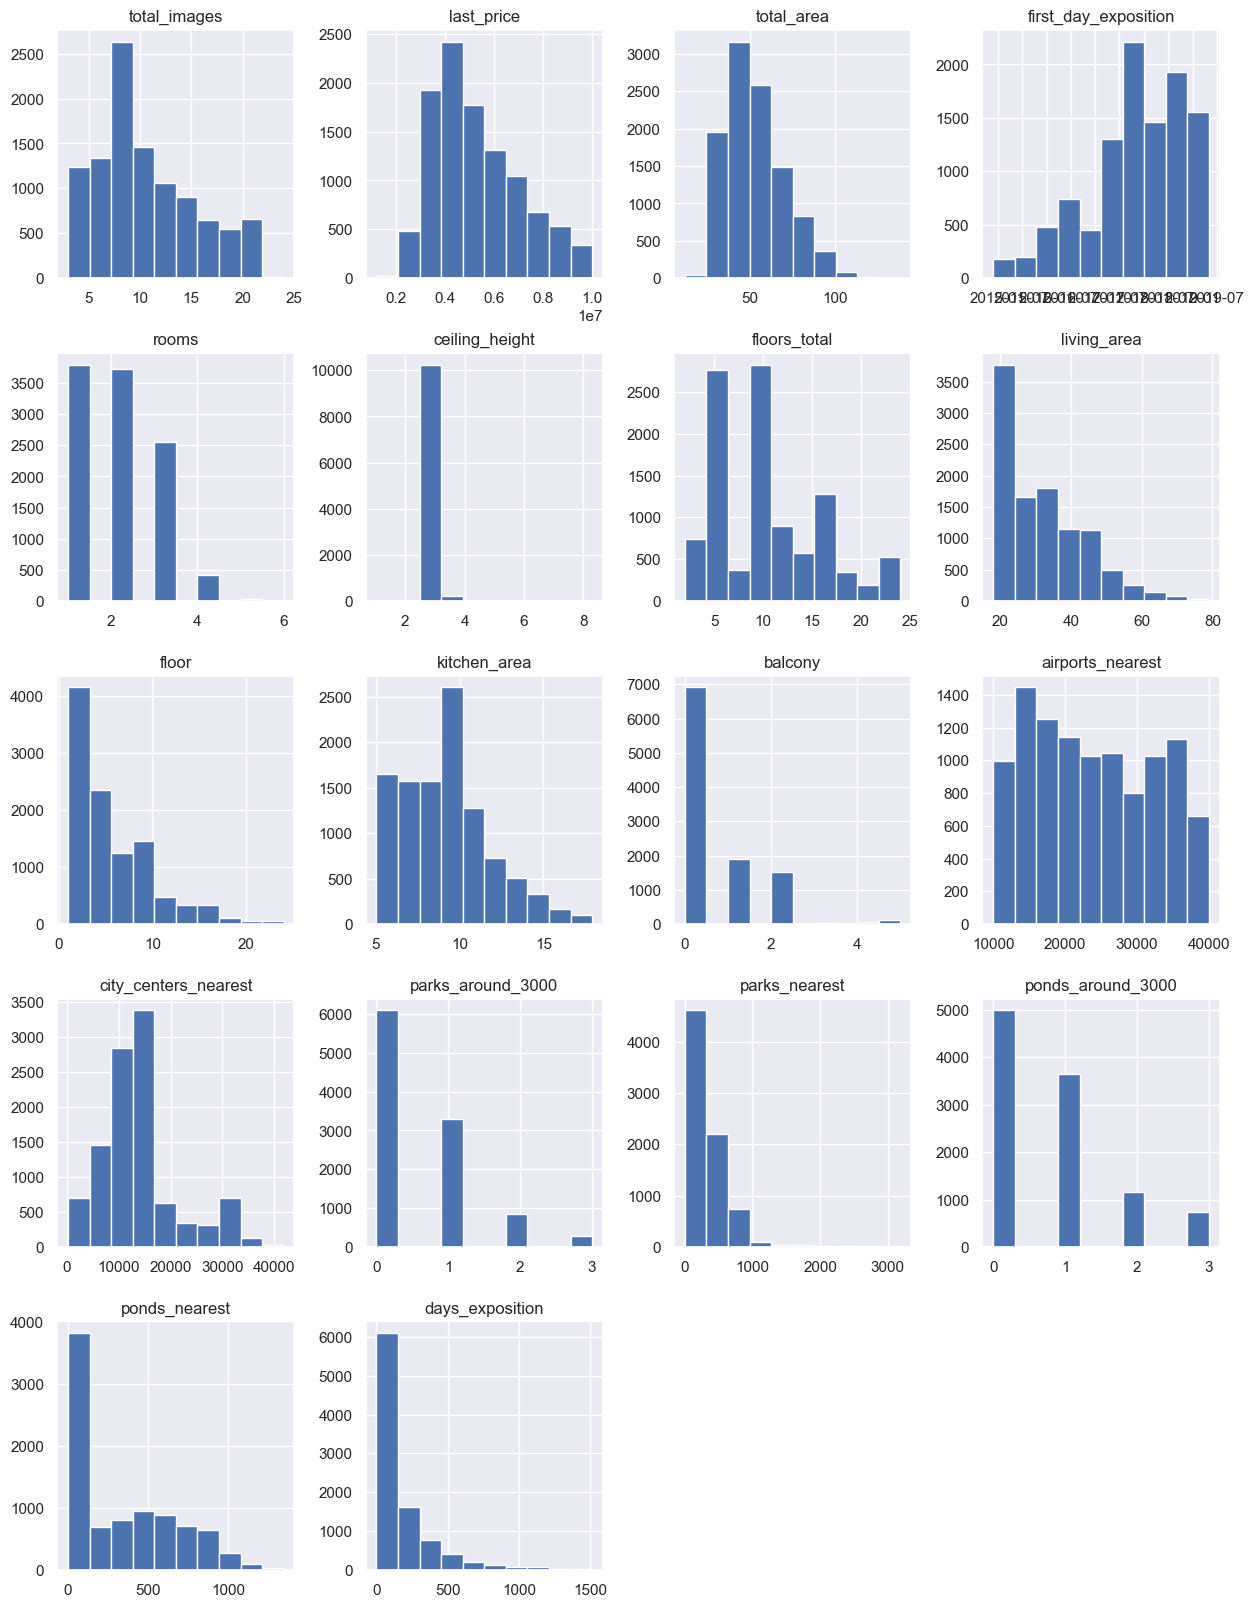

In [692]:
real_estate_df.hist(figsize=(15, 20))

Теперь данные красивые и с ними можно дальше работать

## Вывод
В этапе предобработки данных была проделана большая работа
### Переимонование столбцов
- Переименовали столбцы `cityCenters_nearest`, `ponds_around3000`, `parks_around3000` на `city_centers_nearest`, `ponds_around_3000`, `parks_around_3000` для сохранения общего стиля именования столбцов. 
### Поиск дубликатов
- Явные дубликаты не обнаружены. Но в столбце locality_name были неявные дубликаты из-за буквы ё. Заменили все буквы на ё на буквы е. Помимого этого, для общего стиля перевели все наименования в нижний регистр 
### Удаление пропусков
- В столбце `floors_total` был небольшой процент пропусков, их удалили

- В столбце `ceiling_height` нашли корреляцию между удаленностью от цента и высотой потолков. Чем дальше от центра - тем меньше высота потолков. Разделили данные по удаллености от центра на группы по квартилям и заменили пустые значения высоты потолков медианным значением из этих групп. Остальные пропуски заменили общей медианой высоты потолков.

- В столбце `balcony` заменили пропуски на 0, так как вероятно пропуск в этом столбце говорит об отсутсвии балкона. 

- В столбце `is_apartment` все пропуски заменили на False. Опираясь на логику из предыдущего пункта. Если не указано, значит это не апартаменты. 

- В стобце `living_area` пропуски заменили на медианное значение квартир, разделив их на группы с разным количеством комнат. 

- В столбце `kitchen_area` заменили на просто медианное значение, так как площадь кухни зависит не от количества комнат, а от планировки и застройщика

- В столбце `locality_name` пропуски удалили, так как пропущенных значений мало

- В столбце `parks_nearest` и `ponds_nearest` пропуски заменили на 0, если в столбцах `parks_around_3000` и `ponds_around_3000` стоят 0. Если нет парка в радиусе 3км, то его нет и в шаговой доступности

- В остальных случаях в столбцах `parks_nearest`,`ponds_nearest`,`parks_around_3000`, `ponds_around_3000` пропуски оставили, так как есть большой риск сильно исказать данные. 

- В столбцах `city_centers_nearest` и `airports_nearest` не замечена корреляиция с ценой. Поэтому эти пропуски приняли решение оставить. Их замена может исказить результат

### Изменение типов данных
- В данных, которые содержат столбцы `floors_total`, `balcony`, `total_area`, `last_price` заменили на целочисленное. 

- В столбце `first_day_exposition` изменили тип на дату и время

- В столбцах `parks_around_3000`, `ponds_around_3000`, `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` данные округлили из-за того, что остались пропуски.

# Этап 3. Добавление в таблицу новых признаков со следующими параметрами:

1) цена одного квадратного метра;
2) день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3) месяц публикации объявления;
4) год публикации объявления;
5) тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6) расстояние до центра города в километрах.

In [693]:
real_estate_df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7.0,3350000,40,2018-12-04,1,2.60,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10.0,5196000,56,2015-08-20,2,2.60,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
10,5.0,5050000,39,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20.0,3550000,42,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
14,9.0,4400000,36,2016-06-23,1,2.60,6,18.0,1,False,False,False,8.0,0,пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0
15,16.0,4650000,39,2017-11-18,1,2.60,14,20.5,5,False,False,False,7.6,1,санкт-петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0
16,11.0,6700000,82,2017-11-23,3,3.05,5,55.6,1,False,False,False,9.0,0,санкт-петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
17,6.0,4180000,36,2016-09-09,1,2.60,17,18.0,7,False,False,False,11.0,1,санкт-петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
21,13.0,3200000,31,2018-03-14,1,2.60,5,18.0,2,False,False,False,5.7,1,санкт-петербург,36064.0,9722.0,1.0,248.0,0.0,NaN,310.0
23,11.0,2950000,32,2016-10-29,1,2.60,9,18.0,9,False,False,False,6.1,0,санкт-петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0


Расчитаем цену одного квадратного метра и добавим данные в новый столбец

In [694]:
#поделим цену на общую площадь, данные округлим
real_estate_df['price_per_m2'] = (real_estate_df['last_price'] / real_estate_df['total_area']).round(decimals=0)
real_estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m2
1,7.0,3350000,40,2018-12-04,1,2.60,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,83750.0
2,10.0,5196000,56,2015-08-20,2,2.60,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0
10,5.0,5050000,39,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,129487.0
13,20.0,3550000,42,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,84524.0
14,9.0,4400000,36,2016-06-23,1,2.60,6,18.0,1,False,False,False,8.0,0,пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.0


День недели публикаи рассчитаем на основе значений `first_day_exposition`. Добавим соответсвенно столбцы `weekday`, `month`, `year`.

In [695]:
#получаем дни недели числом
real_estate_df['weekday'] = real_estate_df['first_day_exposition'].dt.weekday.astype('int8') 
#получаем месяц числом
real_estate_df['month'] = real_estate_df['first_day_exposition'].dt.month.astype('int8')
#получаем отдельно год
real_estate_df['year'] = real_estate_df['first_day_exposition'].dt.year.astype('int16')
real_estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year
1,7.0,3350000,40,2018-12-04,1,2.60,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,83750.0,1,12,2018
2,10.0,5196000,56,2015-08-20,2,2.60,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015
10,5.0,5050000,39,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,129487.0,3,11,2017
13,20.0,3550000,42,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,84524.0,5,7,2017
14,9.0,4400000,36,2016-06-23,1,2.60,6,18.0,1,False,False,False,8.0,0,пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.0,3,6,2016


Добавляем столбец категории этажей: первый, последний, другой

In [696]:
real_estate_df['floor_category'] = real_estate_df.apply(lambda row: 
    'первый' if row['floor'] == 1 
    else 'последний' if row['floor']==row['floors_total']
    else 'другой', axis=1)
# поскольку больше нигде не нужно использовать эту функцию - воспользовалась одноразовой лямбда функцией
real_estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_category
1,7.0,3350000,40,2018-12-04,1,2.60,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,83750.0,1,12,2018,первый
2,10.0,5196000,56,2015-08-20,2,2.60,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой
10,5.0,5050000,39,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,129487.0,3,11,2017,другой
13,20.0,3550000,42,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,84524.0,5,7,2017,последний
14,9.0,4400000,36,2016-06-23,1,2.60,6,18.0,1,False,False,False,8.0,0,пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.0,3,6,2016,первый


Добавим расстояние до центра в километрах. Значение округлим

In [697]:
real_estate_df['city_centers_nearest_km'] = (real_estate_df['city_centers_nearest'] / 1000).round(0)
real_estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_category,city_centers_nearest_km
1,7.0,3350000,40,2018-12-04,1,2.60,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,83750.0,1,12,2018,первый,19.0
2,10.0,5196000,56,2015-08-20,2,2.60,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой,14.0
10,5.0,5050000,39,2017-11-16,1,2.67,12,20.3,3,False,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,129487.0,3,11,2017,другой,14.0
13,20.0,3550000,42,2017-07-01,2,2.56,5,27.0,5,False,False,False,5.2,1,петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,84524.0,5,7,2017,последний,33.0
14,9.0,4400000,36,2016-06-23,1,2.60,6,18.0,1,False,False,False,8.0,0,пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,122222.0,3,6,2016,первый,31.0


## Вывод
В ходе этого этапа в наш датафрейм добавилось несколько столбцов:
- `price_per_m2` - цена одного квадратного метра 

- `weekday` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

- `month` - месяц публикации объявления;

- `year` - год публикации объявления;

- `floor_category` - тип этажа квартиры (значения — первый, последний, другой);

- `city_centers_nearest_km` - расстояние до центра города в километрах.


# Этап 4. Провести исследовательский анализ данных:

1) Изучить следующие параметры объектов: 
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- Постройть отдельные гистограммы для каждого из этих параметров. Описать наблюдения по параметрам.

2) Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
- Постройть гистограмму;
- Посчитайте среднее и медиану;
- В ячейке типа markdown описать, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

3) Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
- построить графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией можно использовать сводные таблицы.

4) Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

5) Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.

### Анализ параметров 

**Проведем анализ параметров**

In [698]:
real_estate_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,10519.0,1.073999e+01,4.572501e+00,3.00,8.0,10.0,14.00,24.0
last_price,10519.0,5.279155e+06,1.765104e+06,1200000.00,3900000.0,4907999.0,6440000.00,9999999.0
total_area,10519.0,5.306693e+01,1.727159e+01,12.00,40.0,50.0,63.00,138.0
rooms,10519.0,1.969864e+00,8.899006e-01,1.00,1.0,2.0,3.00,6.0
ceiling_height,10519.0,2.702192e+00,2.375657e-01,1.03,2.6,2.6,2.75,8.3
floors_total,10519.0,1.027246e+01,5.377436e+00,2.00,5.0,9.0,14.00,24.0
living_area,10519.0,3.127304e+01,1.239054e+01,18.00,18.7,30.0,40.00,79.0
floor,10519.0,5.594543e+00,4.263427e+00,1.00,2.0,4.0,8.00,24.0
kitchen_area,10519.0,9.208087e+00,2.620274e+00,5.04,7.0,9.0,10.70,17.9
balcony,10519.0,5.491967e-01,9.021478e-01,0.00,0.0,0.0,1.00,5.0


Изучать параметры объектов будем, опираясь на данные из таблицы статистики и гистограмм

**Изучим общую площадь**

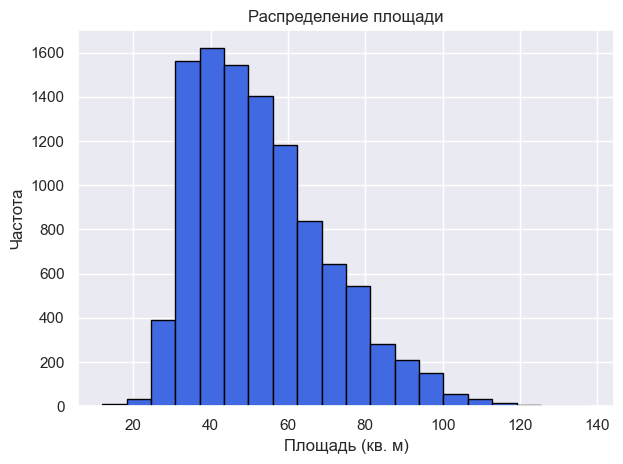

In [699]:
real_estate_df['total_area'].plot(kind='hist', bins=20, color='RoyalBlue', edgecolor='black')
plt.xlabel('Площадь (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение площади')
plt.tight_layout()
plt.show()

Медианным значением является площадь 50 квадратных метров. Гистограмма скошена вправую сторону. Чем больше квадратных метров - тем меньше представлено квартир. После 100 квадратных метров квартир практически нет

**Изучим жилую площадь**

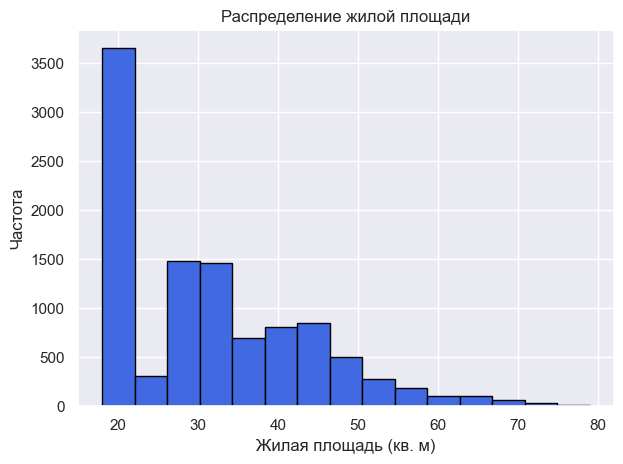

In [700]:
real_estate_df['living_area'].plot(kind='hist', bins=15, color='RoyalBlue', edgecolor='black')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение жилой площади')
plt.tight_layout()
plt.show()

Большинство квартир имеют жилую площадь до 50 квадратных метров. У большинства квартир площадь до 20 квадратных метров. Имеет положительную скошенность с несколькими пиками. Это связано с тем, что  большинство квартир строится по одинаковым стандартам

**Изучми площадь кухни**

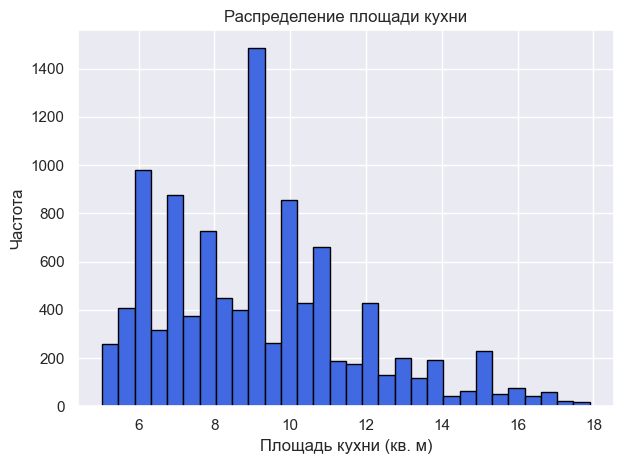

In [701]:
real_estate_df['kitchen_area'].plot(kind='hist', bins=30, color='RoyalBlue', edgecolor='black')
plt.xlabel('Площадь кухни (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение площади кухни')
plt.tight_layout()
plt.show()

В гистограмме присутсвуют пики,. Скорее всего это связано с тем, что часто площадь кухни имеет стандартные размеры, которые никак не зависят от общей площади. Поэтому "стандартных" размеров больше

**Изучим количество комнат**

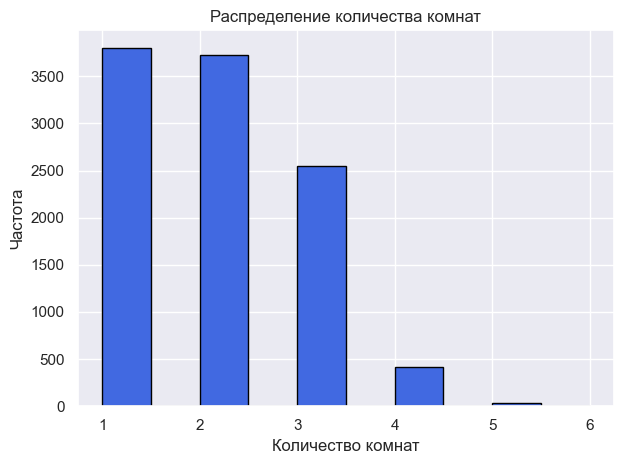

In [702]:
real_estate_df['rooms'].plot(kind='hist', color='RoyalBlue', edgecolor='black')
plt.xlabel('Количество комнат')
plt.ylabel('Частота')
plt.title('Распределение количества комнат')
plt.tight_layout()
plt.show()

Больше 4х комнатах в квартирах встречается очень редко. В основном это 1-2 комнаты

**Изучим высоту потолков**

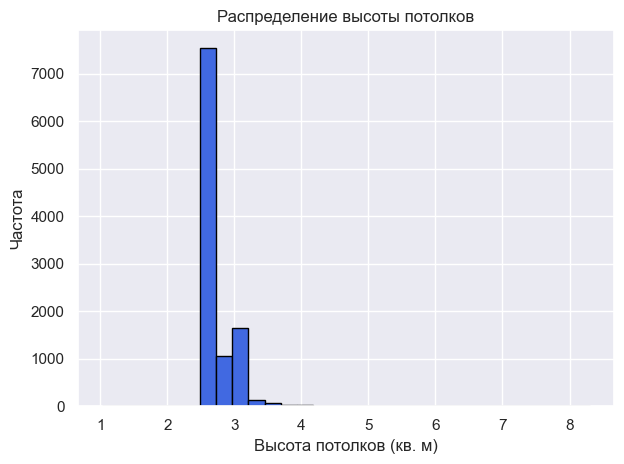

In [703]:
real_estate_df['ceiling_height'].plot(kind='hist', bins=30, color='RoyalBlue', edgecolor='black')
plt.xlabel('Высота потолков (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение высоты потолков')
plt.tight_layout()
plt.show()

Большая часть квартир с высотой потолков до 3 метров. Гистограмма скошена вправо, чем выше потолки тем меньше квартир с такими потолками. 

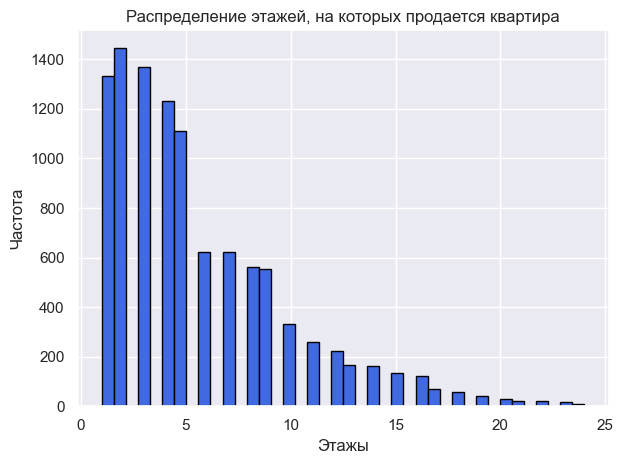

In [704]:
real_estate_df['floor'].plot(kind='hist', bins=40, color='RoyalBlue', edgecolor='black')
plt.xlabel('Этажы')
plt.ylabel('Частота')
plt.title('Распределение этажей, на которых продается квартира')
plt.tight_layout()
plt.show()

Правая скошенность. Больше всего продается до 5 этажа. На 25 этаже продаж практически нет

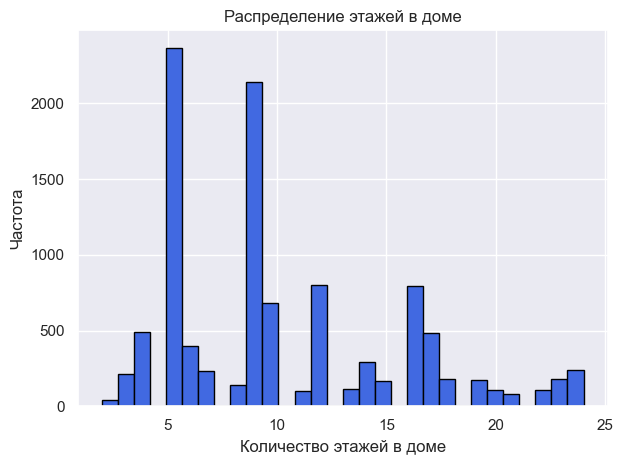

In [705]:
real_estate_df['floors_total'].plot(kind='hist', bins=30, color='RoyalBlue', edgecolor='black')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Частота')
plt.title('Распределение этажей в доме')
plt.tight_layout()
plt.show()

Больше всего пятиэтажек и девятиэтажек. Высоток и домов с меньшим количеством этажей намного меньше. Это, опять же, связано со стандартами. Раньше строились в основном дома на 5 и 9 этажей.

**Изучим тип этажей**

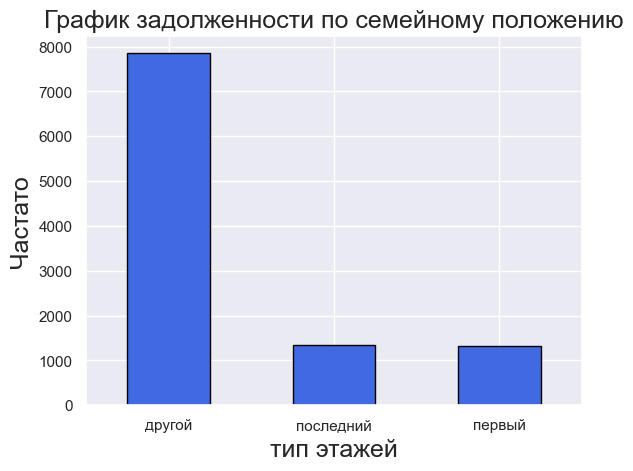

In [706]:
floor_category_hist = real_estate_df['floor_category'].value_counts()
floor_category_hist.plot.bar(color='RoyalBlue', edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel("тип этажей", fontsize=18)
plt.ylabel("Частато", fontsize=18)
plt.title("График задолженности по семейному положению", fontsize=18)
plt.show()

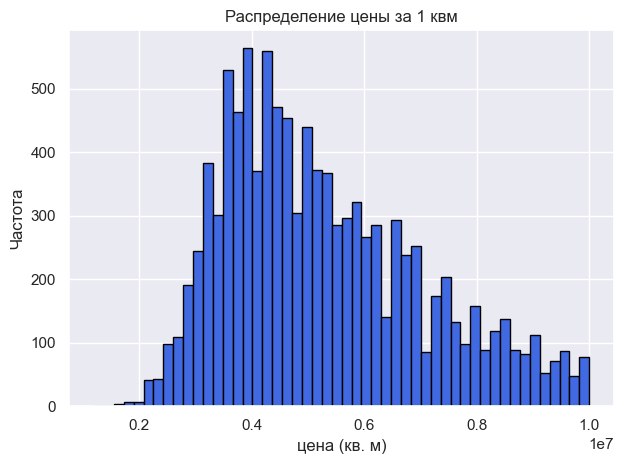

In [707]:
real_estate_df['last_price'].plot(kind='hist', bins=50, color='RoyalBlue', edgecolor='black')
plt.xlabel('цена (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение цены за 1 квм')
plt.tight_layout()
plt.show()

Распределение больше скошено вправо, но наблюдается тенденция распределения Пауссона

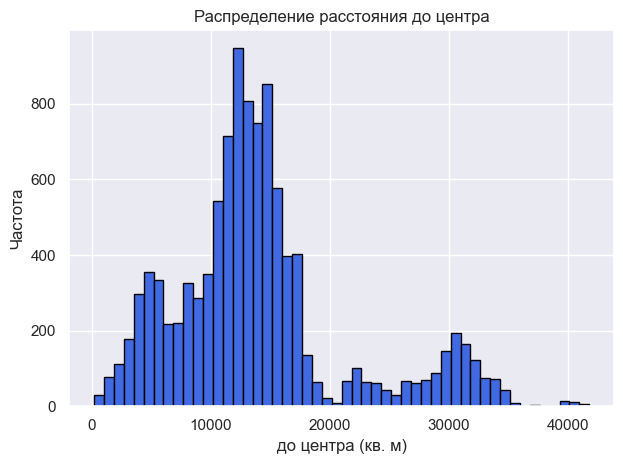

In [708]:
real_estate_df['city_centers_nearest'].plot(kind='hist', bins=50, color='RoyalBlue', edgecolor='black')
plt.xlabel('до центра (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение расстояния до центра')
plt.tight_layout()
plt.show()

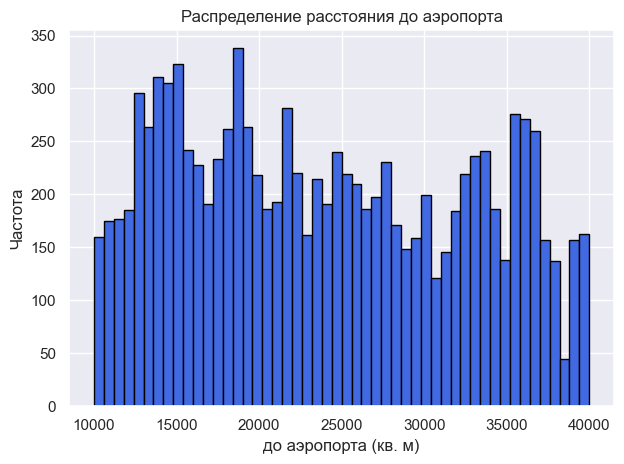

In [709]:
real_estate_df['airports_nearest'].plot(kind='hist', bins=50, color='RoyalBlue', edgecolor='black')
plt.xlabel('до аэропорта (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение расстояния до аэропорта')
plt.tight_layout()
plt.show()

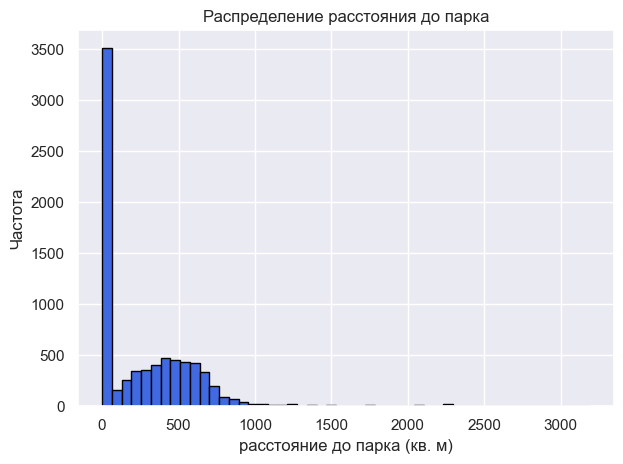

In [710]:
real_estate_df['parks_nearest'].plot(kind='hist', bins=50, color='RoyalBlue', edgecolor='black')
plt.xlabel('расстояние до парка (кв. м)')
plt.ylabel('Частота')
plt.title('Распределение расстояния до парка')
plt.tight_layout()
plt.show()

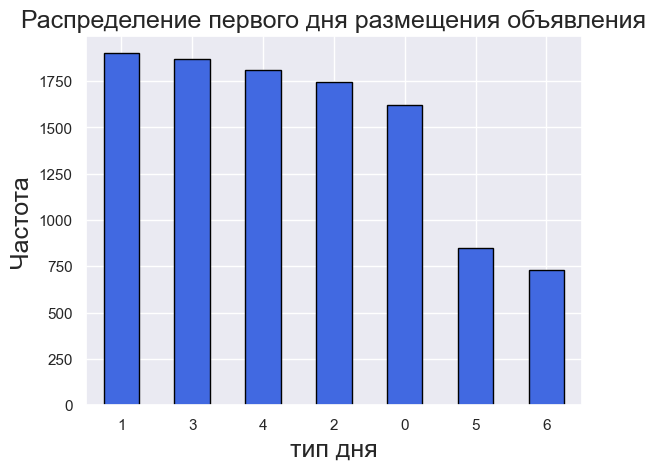

In [711]:
day_category_hist = real_estate_df['weekday'].value_counts()
day_category_hist.plot.bar(color='RoyalBlue', edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel("тип дня", fontsize=18)
plt.ylabel("Частота", fontsize=18)
plt.title("Распределение первого дня размещения объявления", fontsize=18)
plt.show()

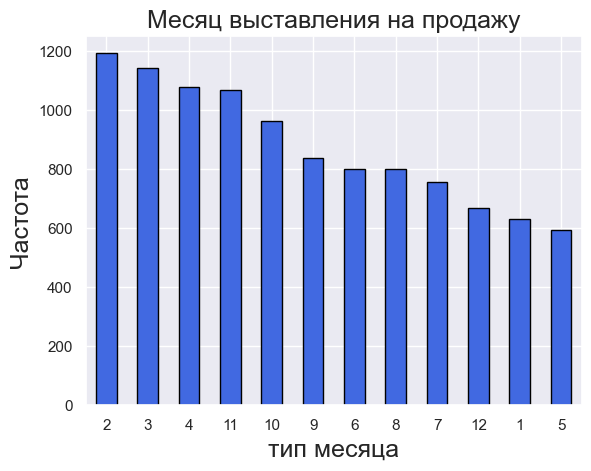

In [712]:
month_category_hist = real_estate_df['month'].value_counts()
month_category_hist.plot.bar(color='RoyalBlue', edgecolor='black')
plt.xticks(rotation=0)
plt.xlabel("тип месяца", fontsize=18)
plt.ylabel("Частота", fontsize=18)
plt.title("Месяц выставления на продажу", fontsize=18)
plt.show()

# Вывод

Анализ параметров объектов

Для начала построим отдельные гистограммы для каждого из параметров и оценим распределение значений. Ниже приведены наблюдения по каждому параметру:

- Общая площадь (total_area_m2): Распределение имеет положительную скошенность (правостороннее). Большинство квартир имеют площадь до 100 квадратных метров;

- Жилая площадь (living_area_m2): Распределение также имеет положительную скошенность. Большинство квартир имеют жилую площадь до 50 квадратных метров;

- Площадь кухни (kitchen_area_m2): Распределение скошено вправо. Большинство квартир имеют площадь кухни до 20 квадратных метров;

- Высота потолков (ceiling_height_m): Распределение имеет пик около значения 2.7 метра, что, вероятно, является стандартной высотой потолков; Однако также есть некоторое количество выбросов с более высокими значениями, возможно, связанными с особенностями некоторых объектов;

- Общее количество этажей в доме (floors_total): Большинство домов имеют до 20 этажей. Наблюдается увеличение числа домов с уменьшением количества этажей; 

- Этаж квартиры (floor): Большинство квартир находятся на этажах от 1 до 8. Также имеются объявления о продаже квартир на последних этажах.
Количество комнат (rooms): Распределение показывает, что большинство квартир имеют от 1 до 3 комнат. Наблюдается уменьшение количества квартир с увеличением количества комнат;

- Количество балконов (balcony): Большинство квартир не имеют балконов или имеют только один. Есть также квартиры с большим количеством балконов;

- Количество фотографий объявления (total_images): Распределение смещено влево, что означает, что большинство объявлений имеют небольшое количество фотографий; 

- Неделя, месяц и год публикации объявления (first_week_exposition, first_month_exposition, first_year_exposition): Эти параметры позволяют оценить динамику публикации объявлений в разные периоды времени;

- Цена объекта (last_price): Распределение цен сильно скошено вправо, что указывает на наличие дорогих объектов. Большинство цен находятся в диапазоне от нескольких миллионов до нескольких десятков миллионов рублей; 

- Количество дней размещения объявления (days_exposition): Распределение имеет положительную скошенность, с большинством объявлений размещенных в течение нескольких дней или недель. Однако есть также значительное количество объявлений, которые размещались в течение длительного периода времени; 
- Расстояние до ближайшего парка, водоема, центра города и аэропорта (parks_nearest_km, ponds_nearest_km, city_centers_nearest_km, airports_nearest_km): Расстояния до ближайших парков, водоемов, центров города и аэропортов имеют разнообразное распределение. Большинство объектов находятся на расстоянии до нескольких километров от этих мест.

- Цена за квадратный метр (price_per_meter): Распределение цены за квадратный метр сильно скошено вправо, что указывает на наличие дорогих объектов. Большинство цен за квадратный метр находятся в диапазоне от нескольких десятков тысяч до нескольких сотен тысяч рублей.

Задание 2

# 4.2. 

In [713]:
real_estate_df['days_exposition'].describe()

count    9361.000000
mean      172.639141
std       213.678133
min         1.000000
25%        40.000000
50%        91.000000
75%       219.000000
max      1512.000000
Name: days_exposition, dtype: float64

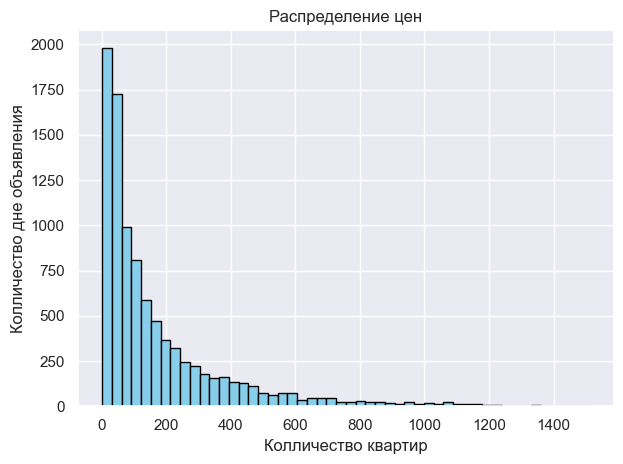

In [714]:
real_estate_df['days_exposition'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Колличество квартир')
plt.ylabel('Колличество дне объявления')
plt.title('Распределение цен')
plt.tight_layout()
plt.show()

По оси X отображатся диапазон значений столбца "days_exposition", колличество квартир, а по оси Y будет отображаться сколько дней было размещено объявление (от публикации до снятия).

# Вывод
На основе описательной статистики столбца "days_exposition" можно сделать следующие выводы:

- Среднее значение (mean) составляет примерно 180.75 дней, что может рассматриваться как средняя продолжительность продажи квартиры;

- Стандартное отклонение (std) равно примерно 219.78 дней, что указывает на значительную вариацию в продолжительности продаж;

- Медианное значение (50%) составляет 95 дней, что означает, что половина объявлений о продаже квартир была размещена на сайте менее чем на 95 дней;

- 25% квартир продаются в течение 45 дней или быстрее;

- 75% квартир продаются в течение 231 дня или дольше

Исходя из этой информации, можно сказать, что продажи, которые занимают менее 45 дней, можно считать быстрыми. Продажи, которые превышают 231 день, можно считать необычно долгими.

Однако стоит отметить, что определение "быстрых" и "долгих" продаж может зависеть от рыночных условий и региона. Поэтому рекомендуется также учитывать контекст и особенности конкретного рынка недвижимости при оценке времени продажи.

# 4.3. Изучим, зависит ли цена от следующих факторов:
Изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
- Постройть гистограмму;
- Посчитайте среднее и медиану;
- В ячейке типа markdown описать, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

In [715]:
real_estate_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_per_m2', 'weekday', 'month',
       'year', 'floor_category', 'city_centers_nearest_km'],
      dtype='object')

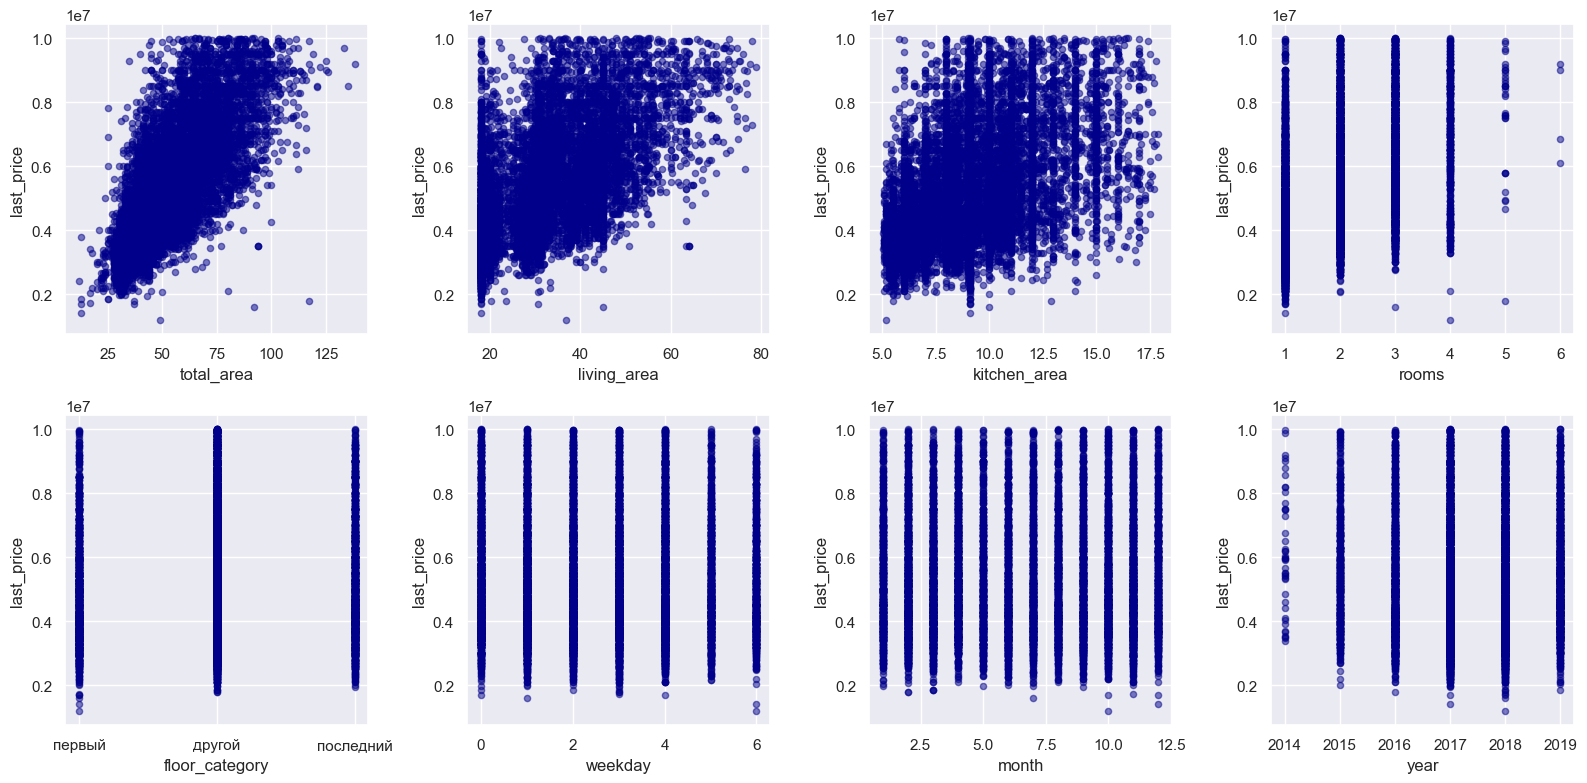

In [716]:
selected_columns = ['total_area','living_area', 'kitchen_area', 
                    'rooms', 'floor_category', 'weekday', 'month', 'year']

name_df = ['scatter_total_area', 'scatter_living_area', 'scatter_kitchen_area', 
                    'scatter_rooms', 'scatter_floor_category', 
                    'scatter_weekday', 'scatter_month', 'scatter_year']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

def scatter_plot(ax, df, col):
    df.plot.scatter(x=col, y='last_price', ax=ax, c='DarkBlue', alpha=0.5)

for i, col in enumerate(selected_columns):
    scatter_plot(axes[i], real_estate_df, col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('last_price')

plt.tight_layout()
plt.show()
       
       




In [717]:
selected_columns = ['total_area','living_area', 'kitchen_area', 
                    'rooms', 'floor_category', 'weekday', 'month', 'year']

data = real_estate_df[selected_columns + ['last_price']]
correlation_matrix = data.corr()
correlation_matrix['last_price']


total_area      0.748268
living_area     0.625722
kitchen_area    0.451808
rooms           0.498799
weekday        -0.013077
month          -0.000214
year            0.025835
last_price      1.000000
Name: last_price, dtype: float64

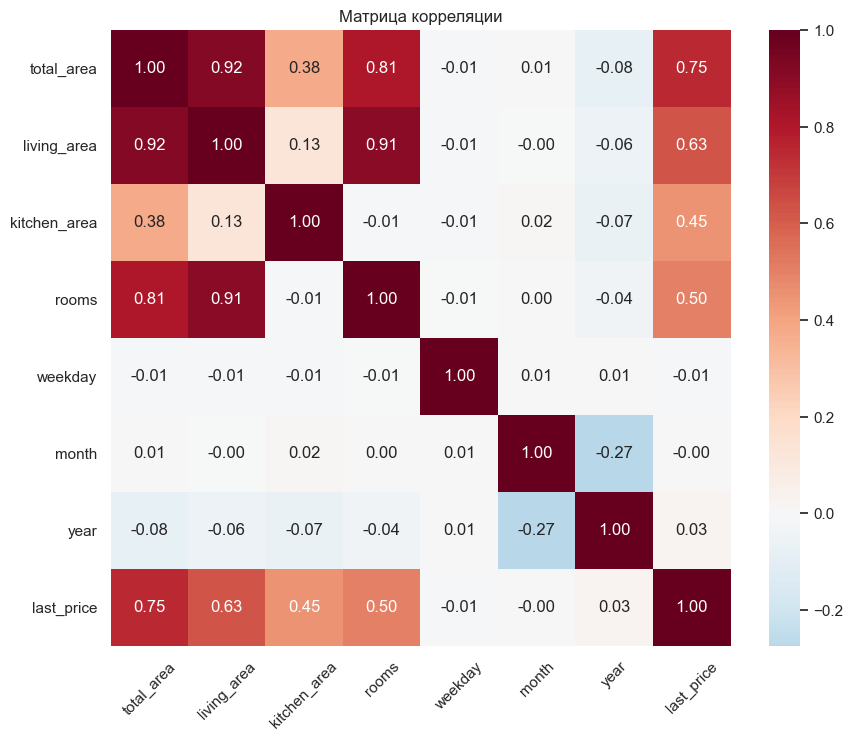

In [718]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",  cmap="RdBu_r", center=0)

# Настройка внешнего вида тепловой карты
plt.title('Матрица корреляции')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Вывод

- Общая площадь (total_area_m2) имеет сильную положительную корреляцию с ценой (коэффициент корреляции 0.634187). Это означает, что с увеличением общей площади квартиры вероятнее всего будет увеличиваться ее цена;

- Жилая площадь (living_area_m2) также имеет сильную положительную корреляцию с ценой (коэффициент корреляции 0.530331). Большая жилая площадь обычно соответствует более высокой цене;

- Площадь кухни (kitchen_area_m2) имеет относительно слабую положительную корреляцию с ценой (коэффициент корреляции 0.403672). Это может указывать на то, что площадь кухни не является основным фактором, влияющим на цену;

- Количество комнат (rooms) также имеет слабую положительную корреляцию с ценой (коэффициент корреляции 0.374371). Большее количество комнат обычно соответствует более высокой цене;

- Этаж, на котором расположена квартира (floor), практически не имеет корреляции с ценой (очень слабая положительная корреляция - коэффициент корреляции 0.027235). Это может означать, что этаж не играет существенной роли в определении цены;

- Дата размещения (день недели, месяц, год) имеет очень слабую корреляцию с ценой. Все коэффициенты корреляции близки к нулю.

Таким образом, основными факторами, которые оказывают влияние на цену квартиры, являются ее общая площадь, жилая площадь, количество комнат. Эти параметры имеют более высокие коэффициенты корреляции с ценой, что указывает на их более сильную связь. Остальные параметры, такие как площадь кухни, этаж и дата размещения, имеют менее значительное влияние на цену.

# №4.4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [719]:
real_estate_df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_per_m2', 'weekday', 'month',
       'year', 'floor_category', 'city_centers_nearest_km'],
      dtype='object')

In [720]:
top_10 = (
    real_estate_df.groupby('locality_name')['price_per_m2']
        .agg(['count', 'mean', 'median'])
        .sort_values(by='count', ascending=False)
        .head(10)
)

print(top_10)

                      count           mean    median
locality_name                                       
санкт-петербург        9131  104544.071953  101087.0
поселок шушары          347   78847.325648   77500.0
колпино                 319   75520.931034   75000.0
пушкин                  291  100679.378007   99987.0
красное село            157   72940.343949   72727.0
петергоф                118   82978.338983   81531.0
поселок металлострой     62   74711.838710   75000.0
поселок стрельна         36   88741.416667   87988.5
павловск                 30   80423.366667   84168.0
поселок понтонный        19   70332.315789   65625.0


вывод 

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод